In [1]:
import tensorflow as tf
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
from tensorflow import keras

# MNIST 데이터셋 로드
(train_input, train_target), (val_input, val_target) = tf.keras.datasets.mnist.load_data()


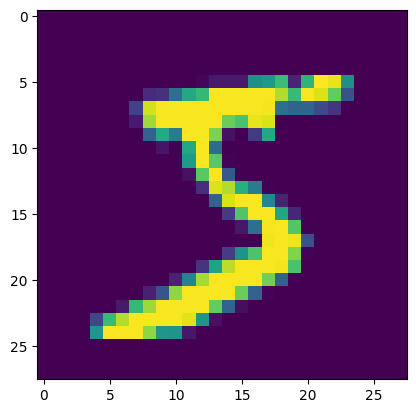

In [2]:
# 다운로드된 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(train_input[0])
plt.show()

In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100

# model configuration -> 안되니 넘어감
# X = tf.platten(tf.float32, [None, 28, 28, 1], name='data')
# Y = tf.placeholder(tf.float32, [None, 10])

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 824,458 (3.15 MB)

 Trainable params: 824,458 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
val_scaled = val_input.reshape(-1, 28, 28, 1) / 255.0
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9422 - loss: 0.2601

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9422 - loss: 0.2600 - val_accuracy: 0.9863 - val_loss: 0.0408
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9837 - loss: 0.0529

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.9837 - loss: 0.0529 - val_accuracy: 0.9883 - val_loss: 0.0311
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9891 - loss: 0.0351

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.9891 - loss: 0.0351 - val_accuracy: 0.9912 - val_loss: 0.0264
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9906 - loss: 0.0281

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9906 - val_loss: 0.0281
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9929 - loss: 0.0207

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.9929 - loss: 0.0207 - val_accuracy: 0.9930 - val_loss: 0.0258
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9937 - loss: 0.0195

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 46ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9930 - val_loss: 0.0235
Epoch 7/20
